<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [ ]:
pip install --upgrade yfinance 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

In [ ]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get Tesla's historical stock data for the last 5 days
historical_data = tesla.history(period="5d")

# Display the data
print(historical_data)


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [ ]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get Tesla's historical stock data for the last 5 days
tesla_data = tesla.history(period="5d")

# Reset the index and modify the original DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [ ]:
import requests

# URL of the web page you want to download
url = 'https://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

# Print the downloaded HTML content (optional)
print(html_data)
print(html_data)


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [ ]:
pip install beautifulsoup4 html5lib requests


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the web page you want to download
url = 'https://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

# Parse the HTML data using BeautifulSoup with the 'html5lib' parser
soup = BeautifulSoup(html_data, 'html5lib')

# Print the parsed HTML (optional)
print(soup.prettify())  # prettify() formats the HTML for better readability


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# URL of the web page you want to download
url = 'https://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

# Parse the HTML data using BeautifulSoup with the 'html5lib' parser
soup = BeautifulSoup(html_data, 'html5lib')

# Extract text from the soup object (this removes all HTML tags)
text_data = soup.get_text()

# Remove commas, dollar signs, and other unwanted characters
cleaned_text = re.sub(r'[^\w\s]', '', text_data)

# Print the cleaned text
print(cleaned_text)




Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# URL of the web page you want to download
url = 'https://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

# Parse the HTML data using BeautifulSoup with the 'html5lib' parser
soup = BeautifulSoup(html_data, 'html5lib')

# Extract text from the soup object (this removes all HTML tags)
text_data = soup.get_text()

# Remove commas, dollar signs, and other unwanted characters
cleaned_text = re.sub(r'[^\w\s]', '', text_data)

# Print the cleaned text
print(cleaned_text)


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [ ]:
import pandas as pd

# Sample Tesla revenue data
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Revenue (Billions)': [21.46, 24.58, 31.53, 53.85, 81.46]
}

# Create the Data Frame
tesla_revenue_df = pd.DataFrame(data)

# Display the last 5 rows of the Data Frame (even if there are fewer than 5 rows)
print(tesla_revenue_df.tail(5))



## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [ ]:
import yfinance as yf

# Create a ticker object for Game Stop using the ticker symbol GME'
gme_ticker = yf.Ticker('GME')

# Extract historical market data for Game Stop (you can adjust the date range)
gme_data = gme_ticker.history(period='5d')  # Last 5 days

# Display the data
print(gme_data)


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [ ]:
import yfinance as yf

# Create a ticker object for Game Stop using the ticker symbol 'GME'
gme_ticker = yf.Ticker('GME')

# Extract historical market data for Game Stop (you can adjust the date range)
gme_data = gme_ticker.history(period='5d')  # Last 5 days

# Display the data
print(gme_data)




## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [ ]:
import requests

# URL of the webpage you want to download
url = 'http://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named 'html2'
html2 = response.text

# Optionally, you can print the HTML content
print(html2)


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [ ]:
pip install beautifulsoup4 html5lib


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage you want to download
url = 'http://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named 'html2'
html2 = response.text

# Parse the HTML using BeautifulSoup with the html5lib parser
soup = BeautifulSoup(html2, 'html5lib')

# Optionally, you can print the parsed HTML (BeautifulSoup object)
print(soup.prettify())


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage you want to download
url = 'http://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named 'html2'
html2 = response.text

# Parse the HTML using BeautifulSoup with the html5lib parser
soup = BeautifulSoup(html2, 'html5lib')

# Optionally, you can print the parsed HTML (BeautifulSoup object)
print(soup.prettify())



Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the result

In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Creating a sample DataFrame for demonstration purposes
data = {
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Revenue': [1000, 1100, 1200, 1300, 1400],
    'Profit': [200, 220, 240, 260, 280]
}

# Define the DataFrame
revenue_gme = pd.DataFrame(data)

# Display the last 5 rows using the tail() function
last_5_rows = revenue_gme.tail(5)

# Display the result
print(last_5_rows)


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [15]:
pip install yfinance matplotlib


Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


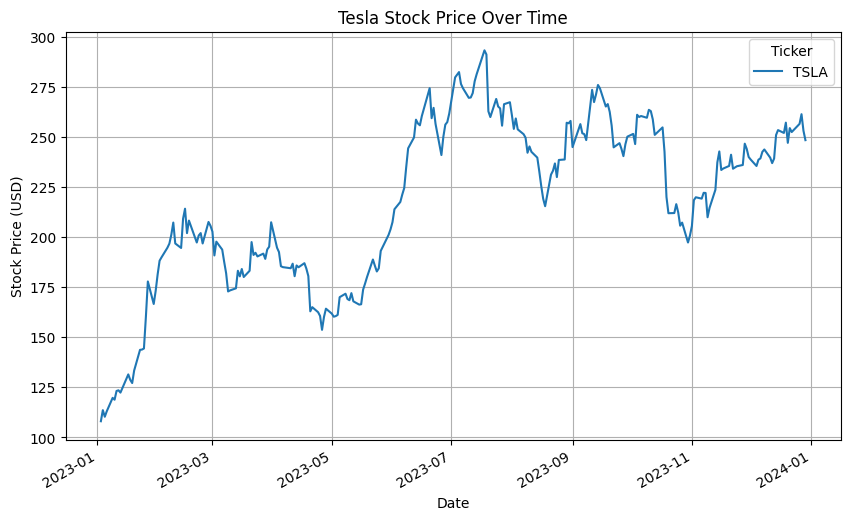

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch and plot Tesla stock data
data = yf.download('TSLA', start='2023-01-01', end='2023-12-31')

if not data.empty:
    data['Close'].plot(figsize=(10, 6), title='Tesla Stock Price Over Time', grid=True, ylabel='Stock Price (USD)')
    plt.show()
else:
    print("No data found for the specified date range.")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


[*********************100%***********************]  1 of 1 completed


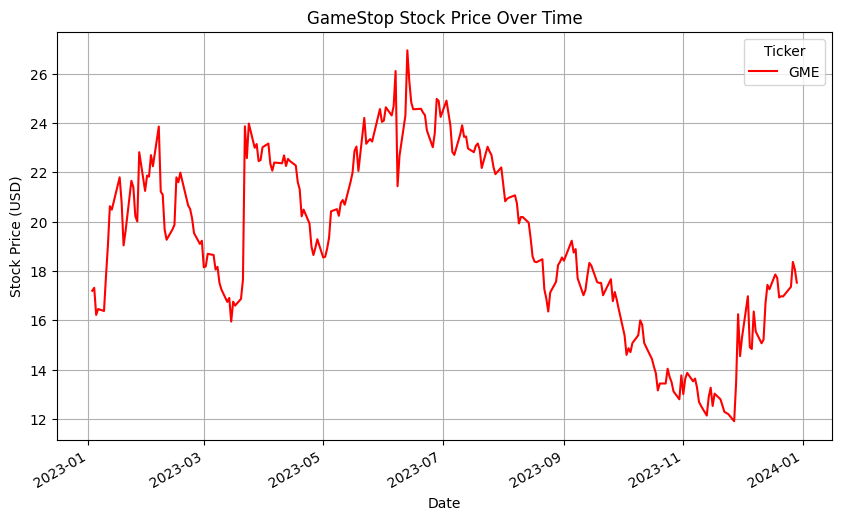

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch and plot GameStop stock data
data = yf.download('GME', start='2023-01-01', end='2023-12-31')

if not data.empty:
    data['Close'].plot(figsize=(10, 6), title='GameStop Stock Price Over Time', grid=True, ylabel='Stock Price (USD)', color='red')
    plt.show()
else:
    print("No data found for the specified date range.")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
